In [18]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
DATA_PATH = "../../corn"
os.path.isdir(DATA_PATH)

True

In [5]:
df = pd.read_csv(f"{DATA_PATH}/train.csv")
df.head()

,seed_id,view,image,label
0,0,top,train/00000.png,broken
1,1,bottom,train/00001.png,pure
2,3,top,train/00003.png,broken
3,4,top,train/00004.png,pure
4,5,top,train/00005.png,discolored


In [13]:
train_df, valid_df = train_test_split(
    df,
    test_size=0.25,
    random_state=42,
    stratify=df.label.values)

In [14]:
train_df.shape

(10741, 4)

In [15]:
valid_df.shape

(3581, 4)

In [16]:
train_df.label.value_counts()

pure          4378
broken        3415
discolored    1878
silkcut       1070
Name: label, dtype: int64

In [17]:
valid_df.label.value_counts()

pure          1459
broken        1139
discolored     626
silkcut        357
Name: label, dtype: int64

The unique labels are: ['broken' 'discolored' 'pure' 'silkcut'] and there values are: [3415 1878 4378 1070]


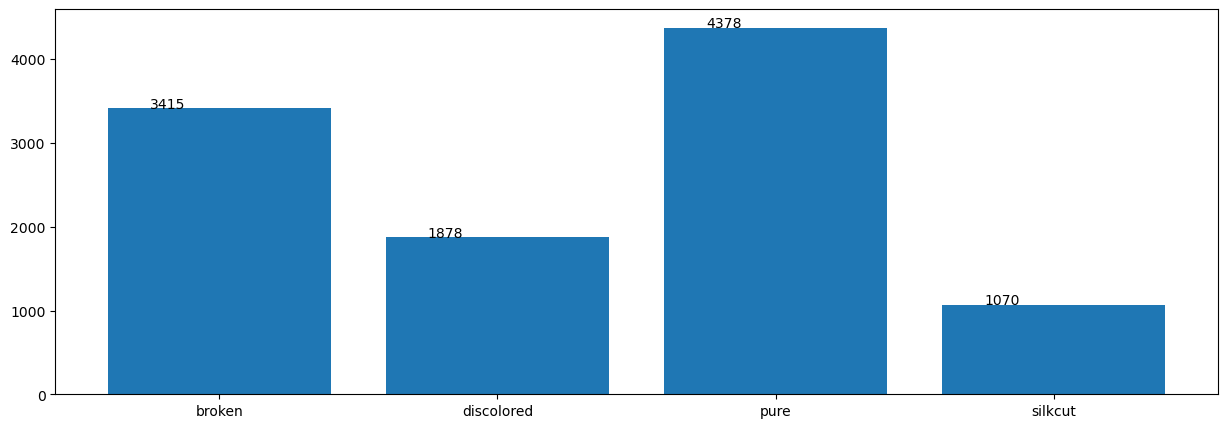

In [20]:
labels, counts = np.unique(train_df.label.values, return_counts=True)
print(f'The unique labels are: {labels} and there values are: {counts}')

plt.figure(figsize=(15,5))
plt.bar(labels, counts)

for index, value in enumerate(counts):
    plt.text(index-0.25, value, str(value), fontdict=dict(fontsize=10))

plt.show()

The unique labels are: ['broken' 'discolored' 'pure' 'silkcut'] and there values are: [1139  626 1459  357]


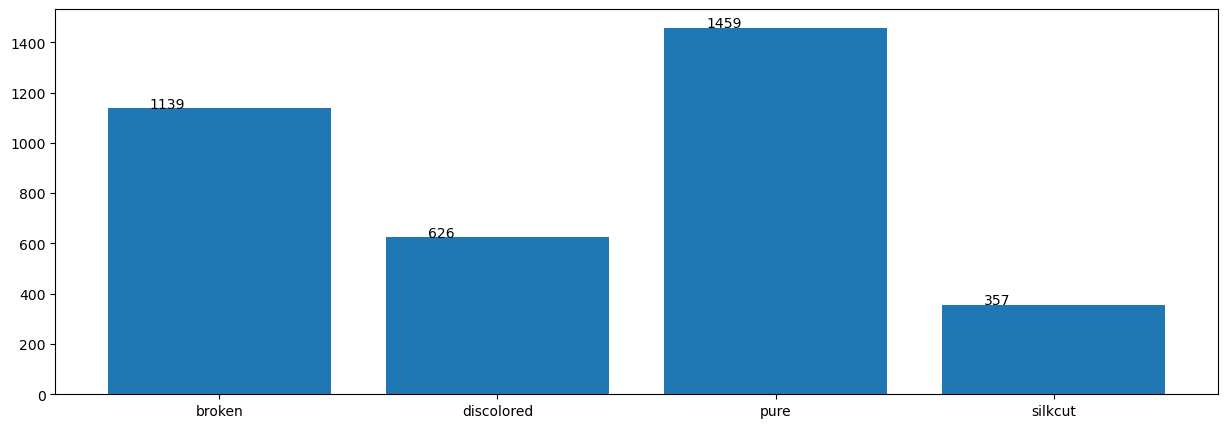

In [21]:
labels, counts = np.unique(valid_df.label.values, return_counts=True)
print(f'The unique labels are: {labels} and there values are: {counts}')

plt.figure(figsize=(15,5))
plt.bar(labels, counts)

for index, value in enumerate(counts):
    plt.text(index-0.25, value, str(value), fontdict=dict(fontsize=10))

plt.show()

In [23]:
train_df.to_csv("../../corn/train_split.csv", index=False)
valid_df.to_csv("../../corn/valid_split.csv", index=False)